This notebook confirms that the targets were generated randomly.

* Available targets: [0, 1, 2, ..., 599]
* Selected targets: `np.random.choice(targets, replace=False, size=600)`

This notebook confirms that by generating targets with the proposed method, then seeing the distribution of various stats (mean, median, max/min) of the differences between targets. The real differences used in the NEXT targets falls within this distribution.

In [1]:
# targets from the next experiment
imgs = [
    "<img src='/static/targets/i0022.png' />",
    "<img src='/static/targets/i0036.png' />",
    "<img src='/static/targets/i0050.png' />",
    "<img src='/static/targets/i0074.png' />",
    "<img src='/static/targets/i0076.png' />",
    "<img src='/static/targets/i0112.png' />",
    "<img src='/static/targets/i0114.png' />",
    "<img src='/static/targets/i0126.png' />",
    "<img src='/static/targets/i0142.png' />",
    "<img src='/static/targets/i0152.png' />",
    "<img src='/static/targets/i0184.png' />",
    "<img src='/static/targets/i0194.png' />",
    "<img src='/static/targets/i0200.png' />",
    "<img src='/static/targets/i0208.png' />",
    "<img src='/static/targets/i0220.png' />",
    "<img src='/static/targets/i0254.png' />",
    "<img src='/static/targets/i0256.png' />",
    "<img src='/static/targets/i0312.png' />",
    "<img src='/static/targets/i0322.png' />",
    "<img src='/static/targets/i0326.png' />",
    "<img src='/static/targets/i0414.png' />",
    "<img src='/static/targets/i0420.png' />",
    "<img src='/static/targets/i0430.png' />",
    "<img src='/static/targets/i0438.png' />",
    "<img src='/static/targets/i0454.png' />",
    "<img src='/static/targets/i0470.png' />",
    "<img src='/static/targets/i0494.png' />",
    "<img src='/static/targets/i0524.png' />",
    "<img src='/static/targets/i0526.png' />",
    "<img src='/static/targets/i0572.png' />",
]

def _fmt(img: str) -> int:
    start = img.find("'")
    img = img[start + 1:]
    end = img.find("'")
    img = img[:end]
    fname = img.split("/")[-1].strip("i.png")
    return int(fname)

targets = list(sorted(_fmt(img) for img in imgs))

In [2]:
from typing import List
import numpy as np

def _get_targets(n: int, seed=1) -> List[int]:
    rng = np.random.RandomState(seed)
    targets = np.random.choice(600, size=n)
    targets.sort()
    return targets.tolist()

stats = []
for k in range(10000):
    new = _get_targets(n=30, seed=k + 1)
    diffs = np.diff(new)
    stats.append({"median": np.median(diffs), "mean": diffs.mean(), "min": diffs.min(), "max": diffs.max()})

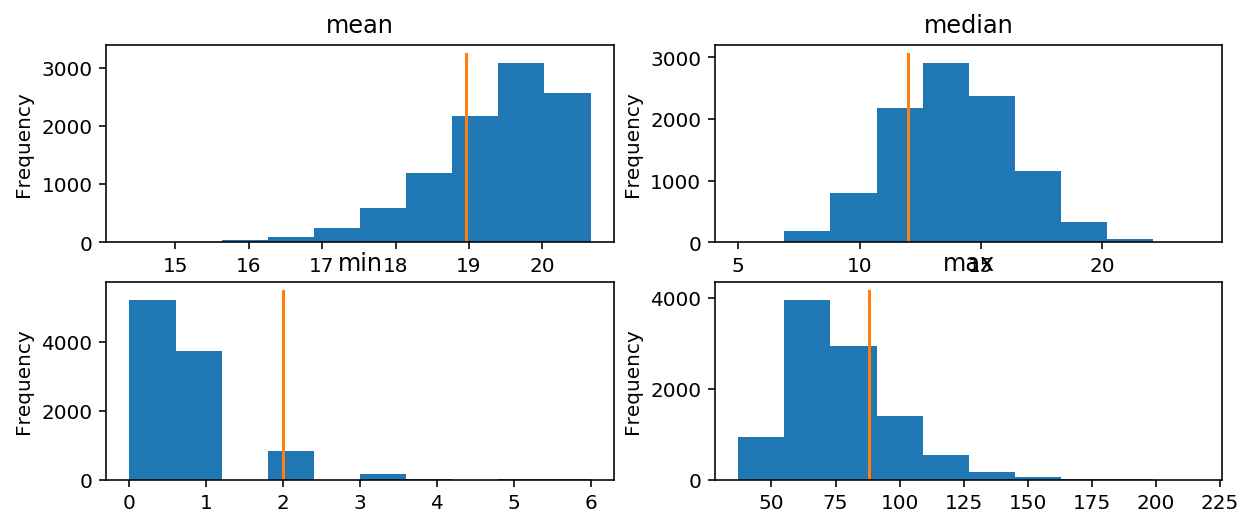

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def _show_agg(df, key, ax):
    ax = df[key].plot.hist(ax=ax)
    ylim = ax.get_ylim()
    real_diffs = np.diff(targets)
    real_stats = {
        "mean": np.mean(real_diffs),
        "median": np.median(real_diffs),
        "min": real_diffs.min(), "max": real_diffs.max(),
    }
    ax.plot([real_stats[key]] * 2, ylim)
    ax.set_title(key)
    return ax
    

df = pd.DataFrame(stats)
w = 4
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(2.5 * w, 1 * w))
_show_agg(df, "mean", axs[0][0])
_show_agg(df, "median", axs[0][1])
_show_agg(df, "min", axs[1][0])
_show_agg(df, "max", axs[1][1])

